# Verificação da estabilidade de um pilar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from nFNC_functions import *
from Entrada_de_dados import *
from ELUi_functions import *

In [2]:
fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N_d, M_d, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b = Entrada_de_dados()
m = 5
l_e = 20*h

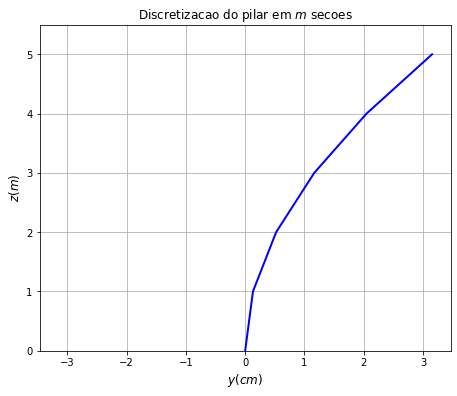

Falha | e (cm) | f (cm) 
------------------------
False | 16.667 | 3.1519


In [3]:
Rompeu, e_1, f = Verificacao_DF(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N_d, M_d, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e)
Curva_viga_DF(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N_d, M_d, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e)
print('Falha | e (cm) | f (cm) ')
print('------------------------')
formatted_string = '{:} | {:.3f} | {:.4f}'.format(Rompeu, e_1*100, f*100)
print(formatted_string)

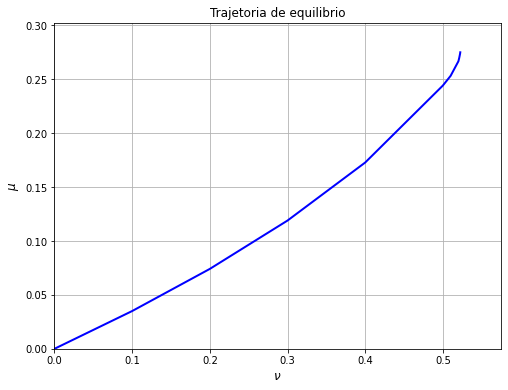

In [4]:
N_1, M_1 = Curva_de_projeto_ELUi(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e, e_1)
nu_1 = np.array(N_1)/(sigma_cd*b*h)
mu_1 = np.array(M_1)/(sigma_cd*b*h**2)

In [5]:
N_cr_1 = N_1[-1]
M_cr_1 = M_1[-1]
print('N_cr: {:.4f} kN'.format(N_cr_1*1e3))
print('M_cr: {:.2f} kNcm'.format(M_cr_1*1e5))

N_cr: 634.3429 kN
M_cr: 16692.80 kNcm


In [6]:
N_r_1, M_r_1 = N_r_M_r(epsilon_c2, epsilon_cu, sigma_cd, n, b, f_yd, epsilon_yd, h, y_t, y_b, y_s, phi, nb, tol_k)
nu_r_1 = np.array(N_r_1)/(sigma_cd*b*h)
mu_r_1 = np.array(M_r_1)/(sigma_cd*b*h**2)

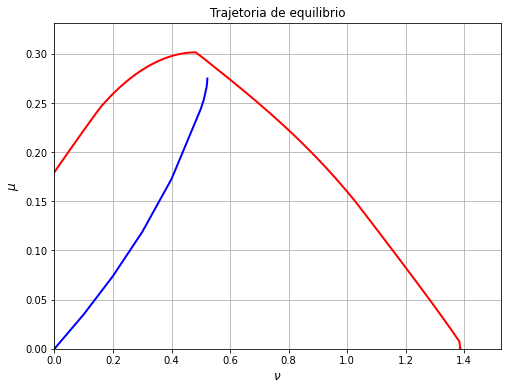

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(nu_1, mu_1, '-b', linewidth=2)
plt.plot(nu_r_1, mu_r_1, '-r', linewidth=2)
plt.xlabel('$ \\nu $', fontsize=12)
plt.ylabel('$ \mu $', fontsize=12)
plt.xlim(min(nu_1), max(nu_r_1) * 1.1)
plt.ylim(min(mu_1), max(mu_r_1) * 1.1)
plt.title('Trajetoria de equilibrio', fontsize=12)
# plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [8]:
i = 1
e_2 = np.zeros(15)
N_cr_2 = np.zeros(15)
M_cr_2 = np.zeros(15)

while i <= 14:
    e_2[i] = i*h/10
    N_cr_2[i], M_cr_2[i] = Normal_critica(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e, e_2[i])
    # M_cr_2[i] = N_cr_2[i]*e_2[i]
    i = i + 1

In [9]:
N_cr_2[0] = Compressao_uniforme(fck, gamma_c, sigma_cd, gamma_conc, f_yk, gamma_s, E_s, f_yd, epsilon_yd, gamma_aco, c, b, h, d, nc, nb, phi, y_s, N_d, epsilon_c2, epsilon_cu, x_lim, n, tol_J, tol_k, tol_f, i, it_max, y_t, y_b, epsilon_0, k, epsilon_0_it, k_it, epsilon_t, epsilon_b, m, l_e)
print('Compressao uniforme')
print('-------------------')
print('N_cr: {:.4f} kN'.format(N_cr_2[0]*1e3))

Compressao uniforme
-------------------
N_cr: 1575.8761 kN


In [10]:
nu_2 = np.zeros(15)
mu_2 = np.zeros(15)
print('e/h | nu_cr   | mu_cr')
print('-----------------------')
for i in range(len(e_2)):
    nu_2[i] = N_cr_2[i]/(sigma_cd*b*h)
    # mu_2[i] = nu_2[i]*e_2[i]/h
    mu_2[i] = M_cr_2[i]/(sigma_cd*b*h**2)
    formatted_string = '{:.1f} | {:.5f} | {:.5f}'.format(e_2[i]/h,nu_2[i], mu_2[i])
    print(formatted_string)

e/h | nu_cr   | mu_cr
-----------------------
0.0 | 1.29778 | 0.00000
0.1 | 0.87830 | 0.08783
0.2 | 0.68270 | 0.13654
0.3 | 0.55410 | 0.16623
0.4 | 0.47120 | 0.18848
0.5 | 0.40910 | 0.20455
0.6 | 0.35450 | 0.21270
0.7 | 0.30390 | 0.21273
0.8 | 0.26350 | 0.21080
0.9 | 0.23170 | 0.20853
1.0 | 0.20630 | 0.20630
1.1 | 0.18560 | 0.20416
1.2 | 0.16860 | 0.20232
1.3 | 0.15430 | 0.20059
1.4 | 0.14220 | 0.19908


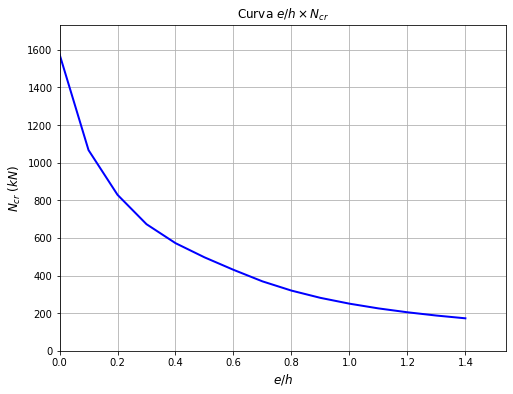

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(e_2/h, N_cr_2*1e3, '-b', linewidth=2)
plt.xlabel('$ e/h $', fontsize=12)
plt.ylabel('$ N_{cr} \; (kN)$', fontsize=12)
plt.xlim(0, max(e_2/h) * 1.1)
plt.ylim(0, max(N_cr_2*1e3) * 1.1)
plt.title('Curva $e/h \\times N_{cr}$', fontsize=12)
# plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

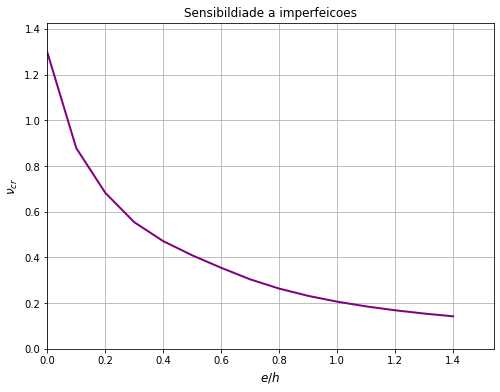

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(e_2/h, nu_2, '-', color = 'purple', linewidth=2)
plt.xlabel('$ e/h $', fontsize=12)
plt.ylabel('$ \\nu_{cr}$', fontsize=12)
plt.xlim(0, max(e_2/h) * 1.1)
plt.ylim(0, max(nu_2) * 1.1)
plt.title('Sensibildiade a imperfeicoes', fontsize=12)
# plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [13]:
index = (np.where(np.sqrt((N_r_1)**2) ==  min(abs(N_r_1))))[0][0]
N_cr_2 = np.append(N_cr_2, N_r_1[index])
M_cr_2 = np.append(M_cr_2, M_r_1[index])
nu_2 = np.append(nu_2, N_r_1[index]/(sigma_cd*b*h))
mu_2 = np.append(mu_2, M_r_1[index]/(sigma_cd*b*h**2))

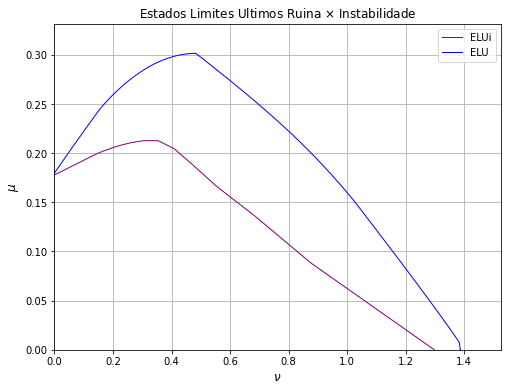

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(nu_2,mu_2, '-', color = 'purple', label = 'ELUi',linewidth=1)
plt.plot(nu_r_1,mu_r_1, '-', color = 'blue', label = 'ELU',linewidth=1)
plt.xlabel('$  \\nu$', fontsize=12)
plt.ylabel('$ \mu$', fontsize=12)
plt.xlim(0, max(nu_r_1) * 1.1)
plt.ylim(0, max(mu_r_1) * 1.1)
plt.title('Estados Limites Ultimos Ruina $\\times$ Instabilidade', fontsize=12)
# plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()

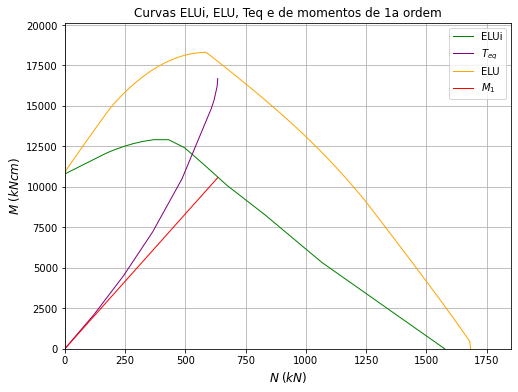

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(N_cr_2*1e3,M_cr_2*1e5, '-', color = 'green', label = 'ELUi',linewidth=1)
plt.plot(N_1*1e3,M_1*1e5, '-', color = 'purple', label = '$T_{eq}$',linewidth=1)
plt.plot(N_r_1*1e3,M_r_1*1e5, '-', color = 'orange', label = 'ELU',linewidth=1)
plt.plot(N_1*1e3,N_1*e_1*1e5, '-', color = 'red', label = '$M_1$',linewidth=1)
plt.xlabel('$ N \; (kN)$', fontsize=12)
plt.ylabel('$ M  \; (kNcm)$', fontsize=12)
plt.xlim(0, max(N_r_1*1e3) * 1.1)
plt.ylim(0, max(M_r_1*1e5) * 1.1)
plt.title('Curvas ELUi, ELU, Teq e de momentos de 1a ordem', fontsize=12)
# plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()